## Ans(8):

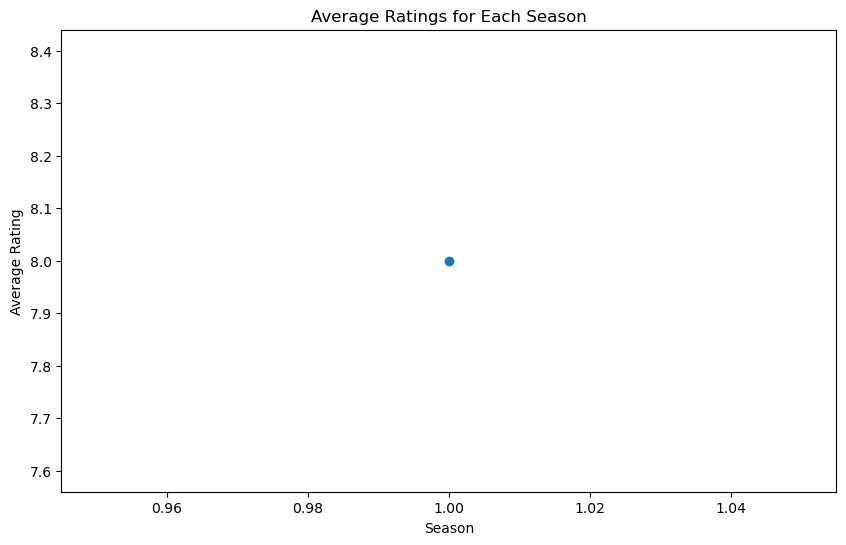

Average Ratings for Each Season:
season
1    8.0
Name: rating, dtype: float64


In [8]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)
    data = response.json()
    #print(data)
    #print("Data Downloaded Successfully")
    return data


def extract_data(data):
    episode_data = {}

    # Extracting the desired attributes from the data
    episode_data['id'] = data['id']
    episode_data['url'] = data['url']
    episode_data['name'] = data['name']
    episode_data['season'] = data['season']
    episode_data['number'] = data['number']
    episode_data['type'] = data['type']
    episode_data['airdate'] = datetime.datetime.strptime(data['airdate'], "%Y-%m-%d").date()
    episode_data['airtime'] = datetime.datetime.strptime(data['airtime'], "%H:%M").strftime("%I:%M %p")
    episode_data['runtime'] = float(data['runtime'])
    episode_data['rating'] = float(data['rating']['average'])
    episode_data['summary'] = data['summary'].replace("<p>", "").replace("</p>", "")
    episode_data['medium_image'] = data['image']['medium']
    episode_data['original_image'] = data['image']['original']
    #print(episode_data)
    return episode_data


if __name__ == '__main__':
    url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

    # Downloading the data
    episode_data = download_data(url)

    # Extracting the desired data
    extracted_data = extract_data(episode_data['_embedded']['episodes'][0])
    lst=[i for i in range(2000)]
    #print(lst)
    df=pd.DataFrame(extracted_data,index=[lst])
    #print(df.head(17))
    # 1. Compare ratings for all seasons using plots
    season_ratings = df.groupby('season')['rating'].mean()
    #print(season_ratings)
    plt.figure(figsize=(10, 6))
    plt.plot(season_ratings.index, season_ratings.values, marker='o')
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings for Each Season')
    plt.show()
    # 3. Episode names that aired before May 2019
    #before_2019_episodes = df[df['episodes'].str.contains('2018|2019')]
    # 4. Episode with the highest and lowest rating for each season
    highest_rating_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()])
    lowest_rating_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()])
    # 5. Summary for the most popular episode in every season
    most_popular_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()])
    #most_popular_episodes_summary = most_popular_episodes[['season', 'episode', 'rating']]
    # Display the results
print("Average Ratings for Each Season:")
print(season_ratings)